## <a> download data from Curl </a> 

In [ ]:
!wget https://transfer.sh/R/dataset.zip

--2021-06-17 18:18:50--  https://transfer.sh/R/dataset.zip
Resolving transfer.sh (transfer.sh)... 144.76.136.153
Connecting to transfer.sh (transfer.sh)|144.76.136.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 403911810 (385M) [application/zip]
Saving to: ‘dataset.zip.2’

dataset.zip.2        25%[====>               ]  98.68M  11.8MB/s    eta 25s    ^C


In [ ]:
!unzip /content/dataset.zip

Archive:  /content/dataset.zip
replace content/drive/MyDrive/dataset/sentiment_analysis_dataset/Electronics_5.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## <a> Import library </a> 

In [ ]:
from nltk.corpus import stopwords
from nltk import word_tokenize
import nltk
import string
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## <a> Read Data as A dataframe </a>

In [ ]:
df=pd.read_csv("/content/content/drive/MyDrive/dataset/sentiment_analysis_dataset/Electronics_5.csv")


In [ ]:
df.head(4)

,Unnamed: 0,overall,reviewText,target
0,0,5,We got this GPS for my husband who is an (OTR)...,pos
1,1,1,"I'm a professional OTR truck driver, and I bou...",neg
2,2,3,"Well, what can I say. I've had this unit in m...",natural
3,3,2,"Not going to write a long review, even thought...",neg


In [ ]:
df.shape

(1689188, 4)

In [ ]:
df.columns

Index(['Unnamed: 0', 'overall', 'reviewText', 'target'], dtype='object')

## <a> drop unnecessary column </a>

In [ ]:
df = df.drop('Unnamed: 0' , axis =1)

In [ ]:
df.head(3)

,overall,reviewText,target
0,5,We got this GPS for my husband who is an (OTR)...,pos
1,1,"I'm a professional OTR truck driver, and I bou...",neg
2,3,"Well, what can I say. I've had this unit in m...",natural


In [ ]:
df.target.value_counts()

pos        1009026
natural     489298
neg         190864
Name: target, dtype: int64

In [ ]:
df1 = df[df['target'] == 'pos'][:40000]
df2 = df[df['target'] == 'natural'][:40000]
df3 = df[df['target'] == 'neg'][:40000]


In [ ]:
df = df1.append([df2 ,df3 ] , sort = True )

## <a> clean Dataset  </a>

In [ ]:


## download stopwords 
stop_words = stopwords.words("english")

## reg for remove special character 
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"


"""
  preprocess function 

  input  : each row from data 

  output : text cleaning 

"""
def preprocess_text(text , stem =False):
    # Remove link,user and special characters
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    text = re.sub(r'[0-9]+', '', text)
    tokens = []
    for token in text.split():
        if token not in stop_words and len(token) >2:
            tokens.append(token)
    return " ".join(tokens)

In [ ]:
df.reviewText = df.reviewText.apply(lambda x: preprocess_text(x))


In [ ]:
df.head(4)

,overall,reviewText,target
0,5,got gps husband otr road trucker impressed shi...,pos
5,5,using nook works described picture samsung exc...,pos
7,5,adaptor real easy setup use right box problem ...,pos
9,5,product really works great found following ite...,pos


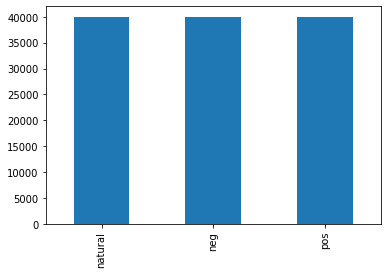

In [ ]:
df.target.value_counts().plot(kind ='bar')

## <a> split Dataset into train and test  </a>

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['reviewText'], df['target'], test_size=0.1, stratify=df['target'])

## print output shape
print("X_train size:", X_train.shape)
print("y_train size:", y_train.shape)
print("X_test size:", X_test.shape)
print("y_test size:", y_test.shape)

X_train size: (108000,)
y_train size: (108000,)
X_test size: (12000,)
y_test size: (12000,)


## Convert text data to numerical data

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vect = CountVectorizer()
tf_train=vect.fit_transform(X_train)  #train the vectorizer, build the vocablury
tf_test=vect.transform(X_test)  #get same encodings on test data as of vocabulary built

## <a> implement Naive Bayes Classifier </a>

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn import svm

##import libraries
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [ ]:
labels = list(np.unique(y_test))
labels

['natural', 'neg', 'pos']

## <a> Accuracy on Naive Bayes </a> 

accuracy on test data is :  0.64075
              precision    recall  f1-score   support

     natural       0.56      0.47      0.51      4000
         neg       0.69      0.75      0.72      4000
         pos       0.65      0.70      0.67      4000

    accuracy                           0.64     12000
   macro avg       0.63      0.64      0.64     12000
weighted avg       0.63      0.64      0.64     12000



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


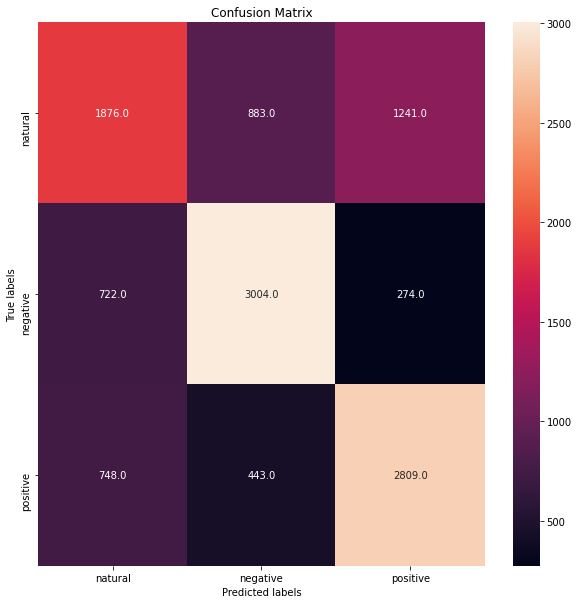

In [ ]:
clf = MultinomialNB( alpha=0.1)
clf.fit(tf_train, y_train)
y_pred = clf.predict(tf_test)
train_pred = clf.predict(tf_train)
print("accuracy on test data is : " , accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels)


plt.figure(figsize=(10,10))
plt.title(" confusion matrix for SVC ")
sns.heatmap(cm , annot =True , fmt="0.1f" ,)


ax= plt.subplot()

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['natural', 'negative', 'positive']); ax.yaxis.set_ticklabels(['natural', 'negative', 'positive' ]);


## <a> Accuracy on logistic regression </a> 

accuracy on test data is :  0.6660833333333334
              precision    recall  f1-score   support

     natural       0.61      0.47      0.53      4000
         neg       0.74      0.78      0.76      4000
         pos       0.63      0.75      0.69      4000

    accuracy                           0.67     12000
   macro avg       0.66      0.67      0.66     12000
weighted avg       0.66      0.67      0.66     12000



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


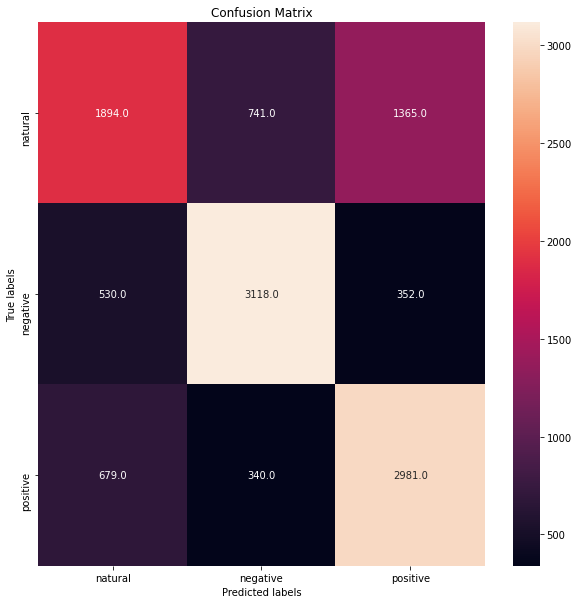

In [ ]:

from sklearn.linear_model import LogisticRegression

lg = LogisticRegression( C = 0.001 ,random_state=0)
lg.fit(tf_train, y_train)
y_pred = lg.predict(tf_test)
train_pred = lg.predict(tf_train)
print("accuracy on test data is : " , accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels)


plt.figure(figsize=(10,10))
plt.title(" confusion matrix for LogisticRegression ")
sns.heatmap(cm , annot =True , fmt="0.1f" ,)


ax= plt.subplot()

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['natural', 'negative', 'positive']); ax.yaxis.set_ticklabels(['natural', 'negative', 'positive' ]);


## <a> Accuracy on decision Tree </a> 

accuracy on test data is :  0.51
              precision    recall  f1-score   support

     natural       0.43      0.41      0.42      4000
         neg       0.59      0.60      0.59      4000
         pos       0.51      0.52      0.51      4000

    accuracy                           0.51     12000
   macro avg       0.51      0.51      0.51     12000
weighted avg       0.51      0.51      0.51     12000



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


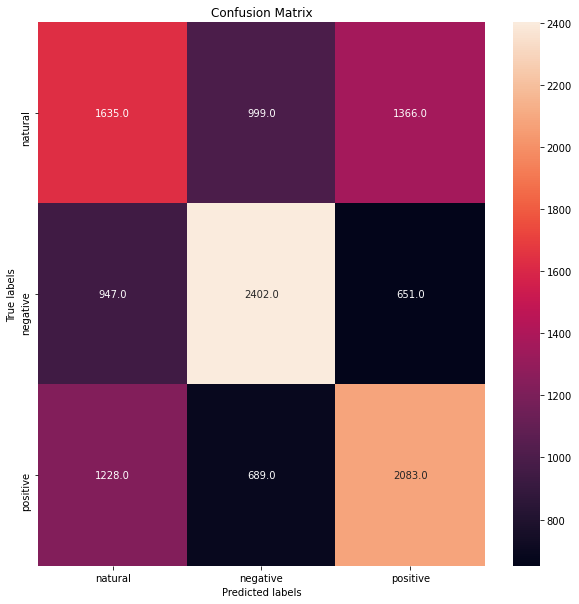

In [ ]:
## random forest 
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='entropy' , max_depth=120, random_state=0)
clf.fit(tf_train, y_train)
y_pred = clf.predict(tf_test)
train_pred = clf.predict(tf_train)
print("accuracy on test data is : " , accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels)


plt.figure(figsize=(10,10))
plt.title(" confusion matrix for LogisticRegression ")
sns.heatmap(cm , annot =True , fmt="0.1f" ,)


ax= plt.subplot()

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['natural', 'negative', 'positive']); ax.yaxis.set_ticklabels(['natural', 'negative', 'positive' ]);


## <a> Accuracy on Gradiant boosting classifier </a> 

accuracy on test data is :  0.5561666666666667
              precision    recall  f1-score   support

     natural       0.51      0.46      0.48      4000
         neg       0.65      0.58      0.61      4000
         pos       0.52      0.63      0.57      4000

    accuracy                           0.56     12000
   macro avg       0.56      0.56      0.56     12000
weighted avg       0.56      0.56      0.56     12000



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


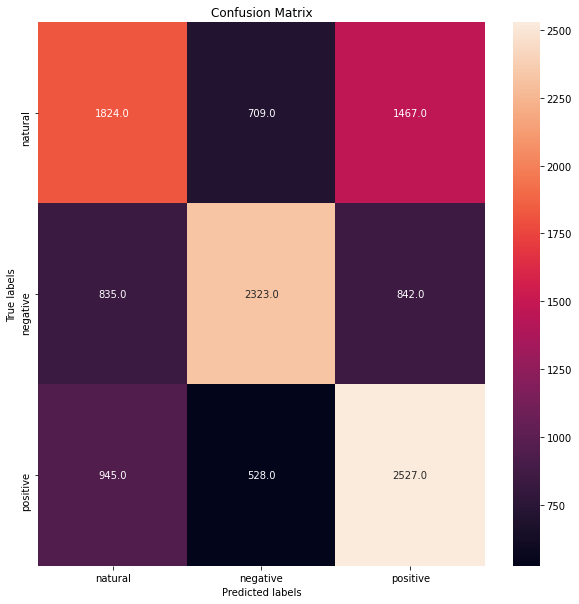

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(learning_rate = 0.01 ,max_depth = 5 , random_state=0)
clf.fit(tf_train, y_train)
y_pred = clf.predict(tf_test)
train_pred = clf.predict(tf_train)
print("accuracy on test data is : " , accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels)


plt.figure(figsize=(10,10))
plt.title(" confusion matrix for LogisticRegression ")
sns.heatmap(cm , annot =True , fmt="0.1f" ,)


ax= plt.subplot()

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['natural', 'negative', 'positive']); ax.yaxis.set_ticklabels(['natural', 'negative', 'positive' ]);


## <a> </a>

In [ ]:
gg=X_test.reset_index(drop=True)
# print(gg)
for i, p in enumerate(predicted):
#     print(i)
    print (gg[i] + " - " + str(p))
    if i>5:
        break #to avoid a lot of printing and slowing down the notebook

## <a>Predict Output  </a>

In [ ]:
test_custom=pd.DataFrame(["i  love this electronics", "this phone is bad ", "it is a horrible incident"])
tf_custom = vect.transform(test_custom[0])
lg.predict(tf_custom)

array(['pos', 'neg', 'neg'], dtype=object)